<a href="https://colab.research.google.com/github/ShivangKeshri/Machine-Learning-Projects/blob/main/CarDekho_Car_Price_Prediction_ML_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import Lasso

In [ ]:
car_price_df = pd.read_csv('car data.csv')
car_price_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_price_df.shape

(301, 9)

In [ ]:
car_price_df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car_price_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the distribution of categorical data
print(car_price_df['Fuel_Type'].value_counts()) # counts no of values for fuel type
print(car_price_df['Seller_Type'].value_counts())
print(car_price_df['Transmission'].value_counts())
#tells us how our data is distributed in out tatset



Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# the string values such as fuel_type of petrol and diesel are not easily understood by the computer so we change them to 1's and 0's
# for the dealer - value is 0
# for the individual - value is 1
# data encoding
car_price_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_price_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_price_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)



<ipython-input-9-d9075d9bc056>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-9-d9075d9bc056>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-9-d9075d9bc056>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`

In [ ]:
car_price_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
 # splitting the data into the car name and selling price
 x = car_price_df.drop(['Car_Name','Selling_Price'],axis=1)
 y = car_price_df['Selling_Price']

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=2)

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# data prediction
training_data_prediction = lin_reg_model.predict(x_train)
print(training_data_prediction)

[ 4.93677017e+00  6.76721971e+00  1.64512571e+01  1.01780854e+01
  3.60163006e+00  1.51559162e+00  4.26460305e+00 -1.73120749e-01
  1.69823425e+00  7.86587500e+00  1.22942175e+00  7.14978172e+00
 -1.18917776e+00  9.07960219e-01  6.97331024e+00  7.75339318e+00
  7.56919349e+00 -3.19813178e+00  3.84593755e+00  7.94172561e+00
  3.46410840e+00  2.57830374e+00  4.24182948e+00 -2.88741569e+00
  5.06717878e+00  1.99600255e+00  3.49179401e+00  7.37349974e+00
  6.67166092e-02  1.82208874e+00  1.58803311e+00  1.86426526e+00
  3.49847888e+00 -1.33372876e+00  3.66663287e-01  6.26435615e+00
  7.02942832e+00  1.30968490e+00  1.94655388e+00  7.43230806e+00
  5.02257296e+00  7.48358394e-01  8.01485181e+00  6.53044757e+00
  1.41190313e+00 -1.64998052e+00  5.12011478e+00  5.80091870e+00
  5.06446124e+00  4.17679859e+00  9.36754337e-01  7.55249483e+00
  3.94366875e+00  1.70107631e-01  1.05061297e+01  4.35948778e+00
  3.03703403e+00  1.91944070e+00  4.82177464e+00  4.74118398e+00
  4.18598500e+00  1.65400

In [ ]:
# R-squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print(f"R-squared error : {error_score}")
Mse = metrics.mean_squared_error(y_train, training_data_prediction)
print(f"MSE : {Mse}")


R-squared error : 0.8978350300596836
MSE : 2.7137370805188534


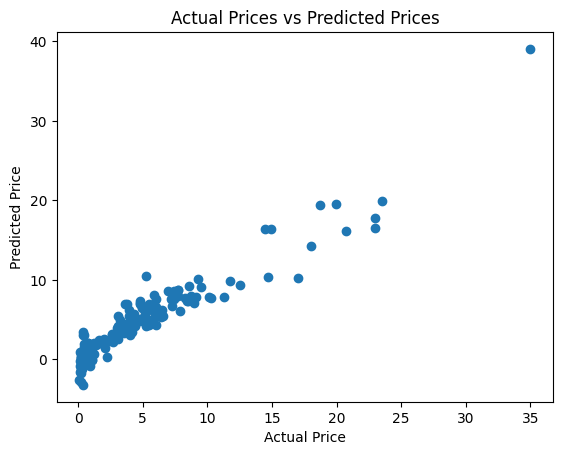

In [ ]:
 plt.scatter(y_train, training_data_prediction)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title("Actual Prices vs Predicted Prices")
 plt.show()

In [ ]:
# prediction
test_data_prediction  = lin_reg_model.predict(x_test)
print(test_data_prediction)

[10.20425401  0.84802368  4.25173874  5.18391672  9.44393004  4.16859474
  7.56551283  7.47093499  0.31781506  5.06679978  6.00604558  6.37823101
  2.23668759  7.43172498  2.08797111  1.74989895  2.08048182  1.92846311
  9.37123832  4.25996832  1.52587604  9.15294728  1.54612275  9.30794342
  0.91340972  8.14700695  1.63289566 -1.79405904  4.18408708  2.12670296
  3.45623683  3.74480013  5.44220227  7.44111256 -1.6059888   6.9557931
  8.2218182   5.66017938  5.98047172  6.49837821 15.63680288  2.10380499
  1.15284659 -0.26238403  7.06146622  6.56314293  1.1533115   6.96745468
 13.58855167  3.11735154  8.12951457 -0.68701604  8.59597663  1.2534707
  2.14084279 -0.49904523  0.80054708  9.67328775 -0.28499369 -2.09102237
 10.00495125  6.56273477  2.13637941  4.27473444  0.15639265  3.78298373
  2.91297832  1.51704932  0.57849055  1.67079582  1.24691412  4.28813194
  6.33983684  1.14487525  0.87638152  6.35358365  3.45536221  2.34121026
  7.30849392  4.5355417   4.40533517  5.00573458  2.8

In [ ]:
# R-squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R-squared error : {error_score}")
Mse = metrics.mean_squared_error(y_test, test_data_prediction)
print(f"MSE : {Mse}")

R-squared error : 0.8262231658783091
MSE : 4.224189037684413


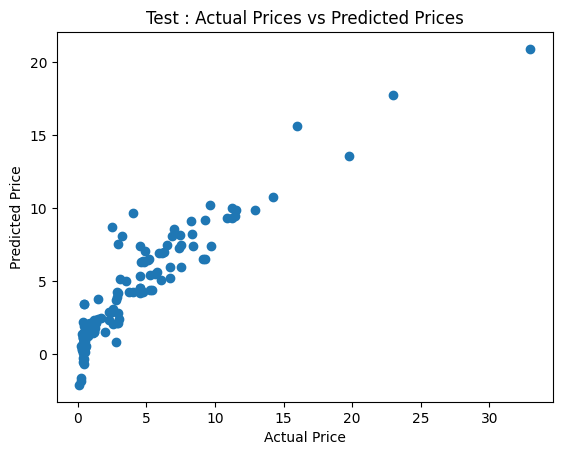

In [ ]:
 plt.scatter(y_test, test_data_prediction)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title("Test : Actual Prices vs Predicted Prices")
 plt.show()

# **Lasso Regression for more optimized predictions**

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(x_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)
mse = metrics.mean_squared_error(y_train, training_data_prediction)
print(f"Mean squared error is : {mse}")

R squared Error :  0.8563059184930775
Mean squared error is : 3.8168460037157272


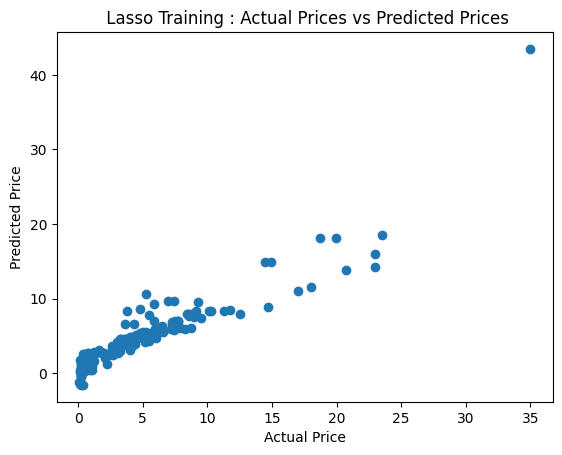

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Lasso Training : Actual Prices vs Predicted Prices")
plt.show()


In [ ]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)
mse = metrics.mean_squared_error(y_test, test_data_prediction)
print(f" Mse value : {mse}")

R squared Error :  0.8006330842938103
 Mse value : 4.846235944276072


In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Lasso test : Actual Prices vs Predicted Prices")
plt.show()

NameError: name 'y_test' is not defined